In [25]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm

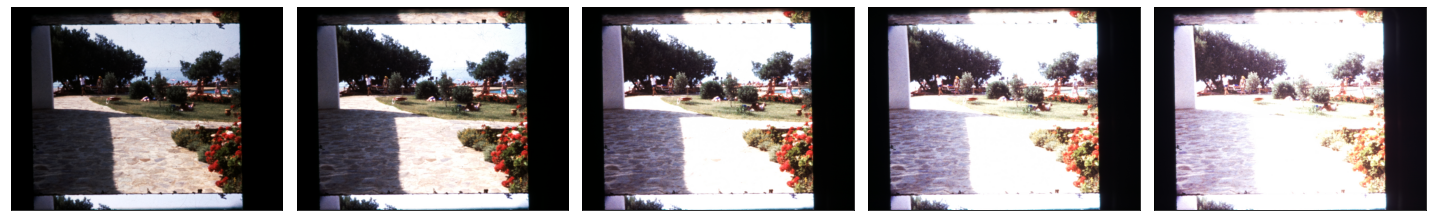

In [11]:
directory = "/Volumes/PortableSSD/kreta_mertens_test_2"
exposures = [f"frame-00669-exp{i}.jpg" for i in range(5)]
filepaths = [f"{directory}/{filename}" for filename in exposures]
images = [cv2.imread(path) for path in filepaths]

plt.figure(figsize=(20,5))
for i, image in enumerate(images):
    plt.subplot(1, 5, i+1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

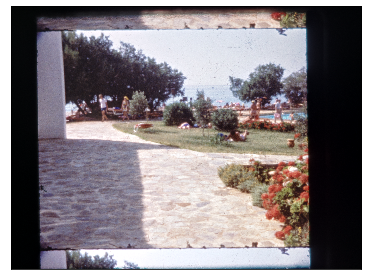

In [19]:
mertens = cv2.createMergeMertens()
merged = mertens.process(images)

minimum = np.percentile(merged, 1)                                 
maximum = np.percentile(merged, 99)
scaler = 1.0 / (maximum - minimum + 1e-6)
scaled = scaler * (merged - minimum)
scaled *= 255
clipped = scaled.clip(0, 255).astype(np.uint8)

plt.imshow(cv2.cvtColor(clipped, cv2.COLOR_BGR2RGB), interpolation="None")
plt.xticks([])
plt.yticks([])
plt.tight_layout()
plt.show()

In [30]:
directory = "/Volumes/PortableSSD/kreta_mertens_test_2"
frames = [f"frame-{i:05d}" for i in range(3630)]


for i, frame in enumerate(tqdm(frames)):
    exposures = [f"{frame}-exp{i}.jpg" for i in range(5)]
    filepaths = [f"{directory}/{filename}" for filename in exposures]
    images = [cv2.imread(path) for path in filepaths]

    mertens = cv2.createMergeMertens()
    merged = mertens.process(images)

    minimum = np.percentile(merged, 1)                                 
    maximum = np.percentile(merged, 99)
    scaler = 1.0 / (maximum - minimum + 1e-6)
    scaled = scaler * (merged - minimum)
    scaled *= 255
    clipped = scaled.clip(0, 255).astype(np.uint8)

    cv2.imwrite(f"/Volumes/PortableSSD/kreta_mertens_test_merged/frame-{i:05d}.png", clipped)


100%|██████████| 3630/3630 [2:44:05<00:00,  2.71s/it]
